<h1>ENB37 - CNNs</h1>
<h2>number of filters</h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


<h2> Loading the datasets</h2>

In [2]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [3]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [4]:
net1 = models.Sequential()
net1.add(layers.Conv1D(filters = 96, kernel_size=2, activation='relu', input_shape=(480,6)))
net1.add(layers.MaxPooling1D(pool_size=2))
net1.add(layers.Flatten())
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 479, 96)           1248      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 239, 96)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 22944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 160615    
Total params: 161,863
Trainable params: 161,863
Non-trainable params: 0
_________________________________________________________________


In [5]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [6]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0

Train on 54 samples, validate on 18 samples
Epoch 1/50
54/54 [==============================] - 0s 3ms/step - loss: 2.0391 - accuracy: 0.1852 - val_loss: 1.7216 - val_accuracy: 0.1111
Epoch 2/50
54/54 [==============================] - 0s 408us/step - loss: 1.8270 - accuracy: 0.1667 - val_loss: 1.7118 - val_accuracy: 0.2778
Epoch 3/50
54/54 [==============================] - 0s 408us/step - loss: 1.6779 - accuracy: 0.3889 - val_loss: 1.5892 - val_accuracy: 0.4444
Epoch 4/50
54/54 [==============================] - 0s 426us/step - loss: 1.5332 - accuracy: 0.5741 - val_loss: 1.4295 - val_accuracy: 0.4444
Epoch 5/50
54/54 [==============================] - 0s 426us/step - loss: 1.3941 - accuracy: 0.5000 - val_loss: 1.3356 - val_accuracy: 0.4444
Epoch 6/50
54/54 [==============================] - 0s 408us/step - loss: 1.2623 - accuracy: 0.6481 - val_loss: 1.2877 - val_accuracy: 0.5000
Epoch 7/50
54/54 [==============================] - 0s 426us/step - loss: 1.1510 - accuracy: 0.7407 - v

54/54 [==============================] - 0s 408us/step - loss: 1.5624 - accuracy: 0.3704 - val_loss: 1.3962 - val_accuracy: 0.8333
Epoch 6/50
54/54 [==============================] - 0s 408us/step - loss: 1.4670 - accuracy: 0.5370 - val_loss: 1.3312 - val_accuracy: 0.6111
Epoch 7/50
54/54 [==============================] - 0s 426us/step - loss: 1.3188 - accuracy: 0.6111 - val_loss: 1.2780 - val_accuracy: 0.7778
Epoch 8/50
54/54 [==============================] - 0s 408us/step - loss: 1.2304 - accuracy: 0.7037 - val_loss: 1.2381 - val_accuracy: 0.6111
Epoch 9/50
54/54 [==============================] - 0s 426us/step - loss: 1.1368 - accuracy: 0.5556 - val_loss: 1.1091 - val_accuracy: 0.5556
Epoch 10/50
54/54 [==============================] - 0s 414us/step - loss: 1.0385 - accuracy: 0.7037 - val_loss: 0.9990 - val_accuracy: 0.8333
Epoch 11/50
54/54 [==============================] - 0s 408us/step - loss: 0.9546 - accuracy: 0.7778 - val_loss: 0.9561 - val_accuracy: 0.7222
Epoch 12/50
54/

54/54 [==============================] - 0s 405us/step - loss: 0.9359 - accuracy: 0.6852 - val_loss: 1.3725 - val_accuracy: 0.5556
Epoch 12/50
54/54 [==============================] - 0s 410us/step - loss: 0.8835 - accuracy: 0.8333 - val_loss: 1.2537 - val_accuracy: 0.5556
Epoch 13/50
54/54 [==============================] - 0s 426us/step - loss: 0.7963 - accuracy: 0.7963 - val_loss: 1.1771 - val_accuracy: 0.3333
Epoch 14/50
54/54 [==============================] - 0s 408us/step - loss: 0.7455 - accuracy: 0.7037 - val_loss: 1.1238 - val_accuracy: 0.5556
Epoch 15/50
54/54 [==============================] - 0s 426us/step - loss: 0.6857 - accuracy: 0.7963 - val_loss: 1.0528 - val_accuracy: 0.6111
Epoch 16/50
54/54 [==============================] - 0s 445us/step - loss: 0.6436 - accuracy: 0.8519 - val_loss: 0.9589 - val_accuracy: 0.7222
Epoch 17/50
54/54 [==============================] - 0s 426us/step - loss: 0.6068 - accuracy: 0.9259 - val_loss: 0.9202 - val_accuracy: 0.6667
Epoch 18/50

54/54 [==============================] - 0s 408us/step - loss: 0.5209 - accuracy: 1.0000 - val_loss: 1.0609 - val_accuracy: 0.6111
Epoch 18/50
54/54 [==============================] - 0s 432us/step - loss: 0.4768 - accuracy: 0.9815 - val_loss: 1.0830 - val_accuracy: 0.6111
Epoch 19/50
54/54 [==============================] - 0s 389us/step - loss: 0.4441 - accuracy: 0.9444 - val_loss: 1.0817 - val_accuracy: 0.6111
Epoch 20/50
54/54 [==============================] - 0s 408us/step - loss: 0.4029 - accuracy: 0.9630 - val_loss: 1.0853 - val_accuracy: 0.5556
Epoch 21/50
54/54 [==============================] - 0s 412us/step - loss: 0.3764 - accuracy: 1.0000 - val_loss: 1.0994 - val_accuracy: 0.4444
Epoch 22/50
54/54 [==============================] - 0s 408us/step - loss: 0.3562 - accuracy: 1.0000 - val_loss: 1.0840 - val_accuracy: 0.6111
Epoch 23/50
54/54 [==============================] - 0s 389us/step - loss: 0.3238 - accuracy: 0.9815 - val_loss: 1.0332 - val_accuracy: 0.6111
Epoch 24/50

In [7]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [0.50415365 0.80000001]
Standard deviation for loss & accuracy:  [0.07926488 0.04714045]
Duration in seconds:  5


In [8]:
net1.save('enb37-1.h5')

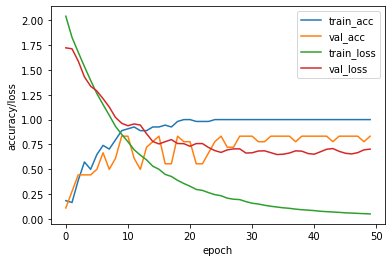

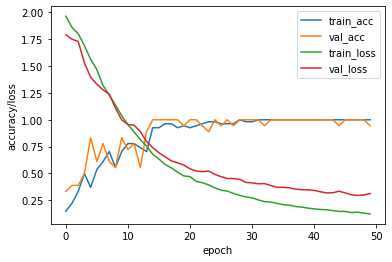

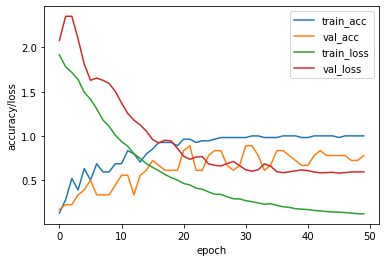

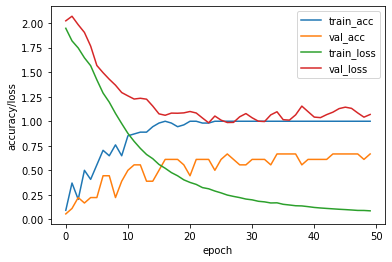

In [9]:
for history in histories1:
    pp.plot_hist(history)

<h2> Expriment2:</h2>

In [10]:
net2 = models.Sequential()
net2.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net2.add(layers.MaxPooling1D(pool_size=2))
net2.add(layers.Flatten())
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 239, 48)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 11472)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 80311     
Total params: 80,935
Trainable params: 80,935
Non-trainable params: 0
_________________________________________________________________


In [11]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

In [12]:
#net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/50
54/54 [==============================] - 0s 2ms/step - loss: 1.9320 - accuracy: 0.1481 - val_loss: 1.8027 - val_accuracy: 0.2222
Epoch 2/50
54/54 [==============================] - 0s 278us/step - loss: 1.9132 - accuracy: 0.1852 - val_loss: 1.7336 - val_accuracy: 0.1111
Epoch 3/50
54/54 [==============================] - 0s 260us/step - loss: 1.7825 - accuracy: 0.1852 - val_loss: 1.6364 - val_accuracy: 0.3889
Epoch 4/50
54/54 [==============================] - 0s 278us/step - loss: 1.6530 - accuracy: 0.5556 - val_loss: 1.5705 - val_accuracy: 0.5000
Epoch 5/50
54/54 [==============================] - 0s 297us/step - loss: 1.6144 - accuracy: 0.4630 - val_loss: 1.5099 - val_accuracy: 0.5000
Epoch 6/50
54/54 [==============================] - 0s 278us/step - loss: 1.4904 - accuracy: 0.5185 - val_loss: 1.4922 - val_accuracy: 0.5000
Epoch 7/50
54/54 [==============================] - 0s 297us/step - loss: 1.4030 - accuracy: 0.7222 - va

54/54 [==============================] - 0s 259us/step - loss: 1.4849 - accuracy: 0.5556 - val_loss: 1.4658 - val_accuracy: 0.5556
Epoch 8/50
54/54 [==============================] - 0s 278us/step - loss: 1.4153 - accuracy: 0.5926 - val_loss: 1.3761 - val_accuracy: 0.6111
Epoch 9/50
54/54 [==============================] - 0s 278us/step - loss: 1.3289 - accuracy: 0.6111 - val_loss: 1.3107 - val_accuracy: 0.6667
Epoch 10/50
54/54 [==============================] - 0s 278us/step - loss: 1.2549 - accuracy: 0.6111 - val_loss: 1.2748 - val_accuracy: 0.7778
Epoch 11/50
54/54 [==============================] - 0s 278us/step - loss: 1.1877 - accuracy: 0.6481 - val_loss: 1.2169 - val_accuracy: 0.7778
Epoch 12/50
54/54 [==============================] - 0s 262us/step - loss: 1.1236 - accuracy: 0.6852 - val_loss: 1.1518 - val_accuracy: 0.7778
Epoch 13/50
54/54 [==============================] - 0s 278us/step - loss: 1.0612 - accuracy: 0.7407 - val_loss: 1.1096 - val_accuracy: 0.7222
Epoch 14/50
5

54/54 [==============================] - 0s 259us/step - loss: 1.0547 - accuracy: 0.5926 - val_loss: 1.4204 - val_accuracy: 0.3333
Epoch 14/50
54/54 [==============================] - 0s 259us/step - loss: 0.9970 - accuracy: 0.6296 - val_loss: 1.3919 - val_accuracy: 0.3333
Epoch 15/50
54/54 [==============================] - 0s 278us/step - loss: 0.9616 - accuracy: 0.5926 - val_loss: 1.3266 - val_accuracy: 0.3333
Epoch 16/50
54/54 [==============================] - 0s 278us/step - loss: 0.8959 - accuracy: 0.6667 - val_loss: 1.2570 - val_accuracy: 0.5000
Epoch 17/50
54/54 [==============================] - 0s 278us/step - loss: 0.8649 - accuracy: 0.7778 - val_loss: 1.2172 - val_accuracy: 0.5000
Epoch 18/50
54/54 [==============================] - 0s 259us/step - loss: 0.8400 - accuracy: 0.5926 - val_loss: 1.1872 - val_accuracy: 0.5000
Epoch 19/50
54/54 [==============================] - 0s 259us/step - loss: 0.7837 - accuracy: 0.7407 - val_loss: 1.1288 - val_accuracy: 0.5000
Epoch 20/50

54/54 [==============================] - 0s 259us/step - loss: 0.7255 - accuracy: 0.8148 - val_loss: 1.1543 - val_accuracy: 0.3889
Epoch 20/50
54/54 [==============================] - 0s 267us/step - loss: 0.6967 - accuracy: 0.8519 - val_loss: 1.1090 - val_accuracy: 0.3889
Epoch 21/50
54/54 [==============================] - 0s 259us/step - loss: 0.6496 - accuracy: 0.9259 - val_loss: 1.1322 - val_accuracy: 0.3333
Epoch 22/50
54/54 [==============================] - 0s 262us/step - loss: 0.6069 - accuracy: 0.9259 - val_loss: 1.1184 - val_accuracy: 0.3333
Epoch 23/50
54/54 [==============================] - 0s 259us/step - loss: 0.5692 - accuracy: 0.9444 - val_loss: 1.0837 - val_accuracy: 0.3889
Epoch 24/50
54/54 [==============================] - 0s 259us/step - loss: 0.5409 - accuracy: 0.9815 - val_loss: 1.0568 - val_accuracy: 0.3889
Epoch 25/50
54/54 [==============================] - 0s 278us/step - loss: 0.5101 - accuracy: 1.0000 - val_loss: 1.0420 - val_accuracy: 0.4444
Epoch 26/50

In [13]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [0.56285704 0.76666668]
Standard deviation for loss & accuracy:  [0.05874702 0.07453559]
Duration in seconds:  3


In [14]:
net2.save('enb37-2.h5')

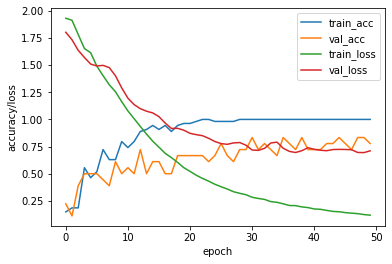

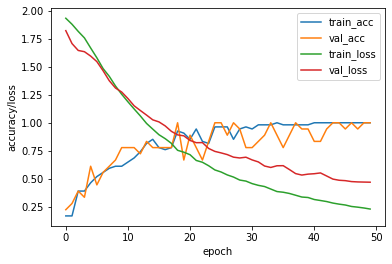

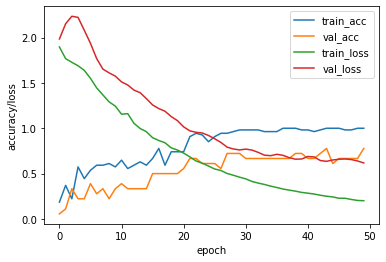

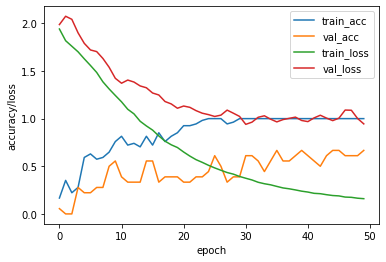

In [15]:
for history in histories2:
    pp.plot_hist(history)

<h2> Expriment3:</h2>

In [16]:
net3 = models.Sequential()
net3.add(layers.Conv1D(filters = 24, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=2))
net3.add(layers.Flatten())
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 479, 24)           312       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 239, 24)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5736)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 40159     
Total params: 40,471
Trainable params: 40,471
Non-trainable params: 0
_________________________________________________________________


In [17]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/50
54/54 [==============================] - 0s 2ms/step - loss: 1.9746 - accuracy: 0.1852 - val_loss: 1.8174 - val_accuracy: 0.2778
Epoch 2/50
54/54 [==============================] - 0s 167us/step - loss: 1.8551 - accuracy: 0.1667 - val_loss: 1.7892 - val_accuracy: 0.1111
Epoch 3/50
54/54 [==============================] - 0s 167us/step - loss: 1.7820 - accuracy: 0.1852 - val_loss: 1.7400 - val_accuracy: 0.1111
Epoch 4/50
54/54 [==============================] - 0s 167us/step - loss: 1.7323 - accuracy: 0.1852 - val_loss: 1.6585 - val_accuracy: 0.3333
Epoch 5/50
54/54 [==============================] - 0s 185us/step - loss: 1.6650 - accuracy: 0.4074 - val_loss: 1.6024 - val_accuracy: 0.4444
Epoch 6/50
54/54 [==============================] - 0s 185us/step - loss: 1.5810 - accuracy: 0.5926 - val_loss: 1.5715 - val_accuracy: 0.3333
Epoch 7/50
54/54 [==============================] - 0s 167us/step - loss: 1.5217 - accuracy: 0.4630 - va

54/54 [==============================] - 0s 185us/step - loss: 1.6143 - accuracy: 0.3889 - val_loss: 1.6205 - val_accuracy: 0.5556
Epoch 8/50
54/54 [==============================] - 0s 204us/step - loss: 1.5493 - accuracy: 0.5741 - val_loss: 1.5844 - val_accuracy: 0.5556
Epoch 9/50
54/54 [==============================] - 0s 185us/step - loss: 1.4936 - accuracy: 0.7222 - val_loss: 1.5278 - val_accuracy: 0.6667
Epoch 10/50
54/54 [==============================] - 0s 185us/step - loss: 1.4376 - accuracy: 0.7222 - val_loss: 1.4393 - val_accuracy: 0.7222
Epoch 11/50
54/54 [==============================] - 0s 167us/step - loss: 1.3735 - accuracy: 0.7407 - val_loss: 1.3766 - val_accuracy: 0.7222
Epoch 12/50
54/54 [==============================] - 0s 167us/step - loss: 1.3140 - accuracy: 0.6296 - val_loss: 1.3504 - val_accuracy: 0.7222
Epoch 13/50
54/54 [==============================] - 0s 185us/step - loss: 1.2719 - accuracy: 0.6852 - val_loss: 1.3366 - val_accuracy: 0.7222
Epoch 14/50
5

54/54 [==============================] - 0s 185us/step - loss: 1.2620 - accuracy: 0.6296 - val_loss: 1.5928 - val_accuracy: 0.3333
Epoch 14/50
54/54 [==============================] - 0s 167us/step - loss: 1.2048 - accuracy: 0.6481 - val_loss: 1.5191 - val_accuracy: 0.2222
Epoch 15/50
54/54 [==============================] - 0s 167us/step - loss: 1.1640 - accuracy: 0.6852 - val_loss: 1.4604 - val_accuracy: 0.6667
Epoch 16/50
54/54 [==============================] - 0s 185us/step - loss: 1.1247 - accuracy: 0.8148 - val_loss: 1.4292 - val_accuracy: 0.5000
Epoch 17/50
54/54 [==============================] - 0s 185us/step - loss: 1.0901 - accuracy: 0.7222 - val_loss: 1.4363 - val_accuracy: 0.4444
Epoch 18/50
54/54 [==============================] - 0s 167us/step - loss: 1.0477 - accuracy: 0.7037 - val_loss: 1.4382 - val_accuracy: 0.3889
Epoch 19/50
54/54 [==============================] - 0s 185us/step - loss: 1.0026 - accuracy: 0.7222 - val_loss: 1.3924 - val_accuracy: 0.3889
Epoch 20/50

54/54 [==============================] - 0s 148us/step - loss: 0.9809 - accuracy: 0.8148 - val_loss: 1.4135 - val_accuracy: 0.3333
Epoch 20/50
54/54 [==============================] - 0s 167us/step - loss: 0.9483 - accuracy: 0.7037 - val_loss: 1.3696 - val_accuracy: 0.3889
Epoch 21/50
54/54 [==============================] - 0s 185us/step - loss: 0.9142 - accuracy: 0.7593 - val_loss: 1.3420 - val_accuracy: 0.3889
Epoch 22/50
54/54 [==============================] - 0s 167us/step - loss: 0.8775 - accuracy: 0.8333 - val_loss: 1.3158 - val_accuracy: 0.4444
Epoch 23/50
54/54 [==============================] - 0s 167us/step - loss: 0.8520 - accuracy: 0.8519 - val_loss: 1.3068 - val_accuracy: 0.5556
Epoch 24/50
54/54 [==============================] - 0s 167us/step - loss: 0.8195 - accuracy: 0.8519 - val_loss: 1.2656 - val_accuracy: 0.5556
Epoch 25/50
54/54 [==============================] - 0s 167us/step - loss: 0.7910 - accuracy: 0.9074 - val_loss: 1.2372 - val_accuracy: 0.5556
Epoch 26/50

In [18]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.6275479  0.75000001]
Standard deviation for loss & accuracy:  [0.08103008 0.09860132]
Duration in seconds:  2


In [19]:
net3.save('enb37-3.h5')

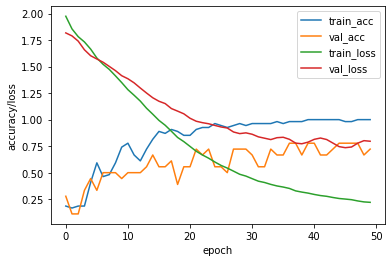

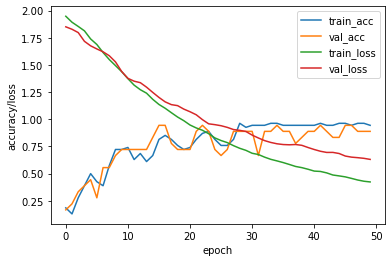

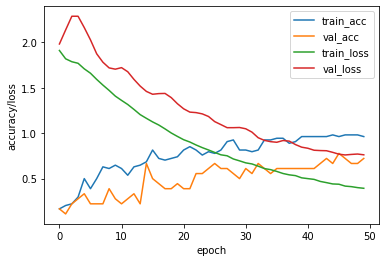

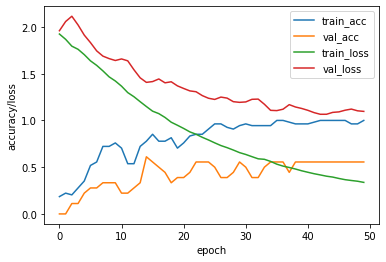

In [20]:
for history in histories3:
    pp.plot_hist(history)

<h2> Expriment4:</h2>

In [29]:
net4 = models.Sequential()
net4.add(layers.Conv1D(filters = 12, kernel_size=2, activation='relu', input_shape=(480,6)))
net4.add(layers.MaxPooling1D(pool_size=2))
net4.add(layers.Flatten())
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 479, 12)           156       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 239, 12)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2868)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 20083     
Total params: 20,239
Trainable params: 20,239
Non-trainable params: 0
_________________________________________________________________


In [30]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 0s 2ms/step - loss: 2.0500 - accuracy: 0.1111 - val_loss: 1.8224 - val_accuracy: 0.2222
Epoch 2/100
54/54 [==============================] - 0s 167us/step - loss: 1.8577 - accuracy: 0.1481 - val_loss: 1.7246 - val_accuracy: 0.3889
Epoch 3/100
54/54 [==============================] - 0s 140us/step - loss: 1.8145 - accuracy: 0.3889 - val_loss: 1.6806 - val_accuracy: 0.1667
Epoch 4/100
54/54 [==============================] - 0s 148us/step - loss: 1.7660 - accuracy: 0.3333 - val_loss: 1.6409 - val_accuracy: 0.5000
Epoch 5/100
54/54 [==============================] - 0s 148us/step - loss: 1.7170 - accuracy: 0.5370 - val_loss: 1.6167 - val_accuracy: 0.5000
Epoch 6/100
54/54 [==============================] - 0s 148us/step - loss: 1.6738 - accuracy: 0.5000 - val_loss: 1.5751 - val_accuracy: 0.3889
Epoch 7/100
54/54 [==============================] - 0s 167us/step - loss: 1.6156 - accuracy: 0.53

54/54 [==============================] - 0s 167us/step - loss: 0.2477 - accuracy: 1.0000 - val_loss: 0.7203 - val_accuracy: 0.8333
Epoch 58/100
54/54 [==============================] - 0s 130us/step - loss: 0.2379 - accuracy: 1.0000 - val_loss: 0.6915 - val_accuracy: 0.8333
Epoch 59/100
54/54 [==============================] - 0s 148us/step - loss: 0.2383 - accuracy: 1.0000 - val_loss: 0.6733 - val_accuracy: 0.8333
Epoch 60/100
54/54 [==============================] - 0s 130us/step - loss: 0.2275 - accuracy: 1.0000 - val_loss: 0.6830 - val_accuracy: 0.7778
Epoch 61/100
54/54 [==============================] - 0s 167us/step - loss: 0.2207 - accuracy: 1.0000 - val_loss: 0.7046 - val_accuracy: 0.7778
Epoch 62/100
54/54 [==============================] - 0s 148us/step - loss: 0.2154 - accuracy: 1.0000 - val_loss: 0.7114 - val_accuracy: 0.7778
Epoch 63/100
54/54 [==============================] - 0s 130us/step - loss: 0.2094 - accuracy: 1.0000 - val_loss: 0.6999 - val_accuracy: 0.8333
Epoch

54/54 [==============================] - 0s 148us/step - loss: 1.2553 - accuracy: 0.6111 - val_loss: 1.3064 - val_accuracy: 0.5556
Epoch 14/100
54/54 [==============================] - 0s 130us/step - loss: 1.2078 - accuracy: 0.6111 - val_loss: 1.2708 - val_accuracy: 0.6111
Epoch 15/100
54/54 [==============================] - 0s 148us/step - loss: 1.1556 - accuracy: 0.6111 - val_loss: 1.2364 - val_accuracy: 0.7222
Epoch 16/100
54/54 [==============================] - 0s 130us/step - loss: 1.1093 - accuracy: 0.6667 - val_loss: 1.2104 - val_accuracy: 0.6111
Epoch 17/100
54/54 [==============================] - 0s 148us/step - loss: 1.0704 - accuracy: 0.6667 - val_loss: 1.1906 - val_accuracy: 0.6111
Epoch 18/100
54/54 [==============================] - 0s 130us/step - loss: 1.0300 - accuracy: 0.6852 - val_loss: 1.1475 - val_accuracy: 0.7778
Epoch 19/100
54/54 [==============================] - 0s 148us/step - loss: 0.9855 - accuracy: 0.7407 - val_loss: 1.1058 - val_accuracy: 0.6667
Epoch

Epoch 70/100
54/54 [==============================] - 0s 130us/step - loss: 0.2664 - accuracy: 1.0000 - val_loss: 0.5306 - val_accuracy: 0.8889
Epoch 71/100
54/54 [==============================] - 0s 148us/step - loss: 0.2600 - accuracy: 1.0000 - val_loss: 0.5204 - val_accuracy: 0.8889
Epoch 72/100
54/54 [==============================] - 0s 130us/step - loss: 0.2576 - accuracy: 1.0000 - val_loss: 0.5109 - val_accuracy: 0.8889
Epoch 73/100
54/54 [==============================] - 0s 148us/step - loss: 0.2516 - accuracy: 1.0000 - val_loss: 0.5053 - val_accuracy: 0.8889
Epoch 74/100
54/54 [==============================] - 0s 130us/step - loss: 0.2449 - accuracy: 1.0000 - val_loss: 0.5015 - val_accuracy: 0.9444
Epoch 75/100
54/54 [==============================] - 0s 148us/step - loss: 0.2409 - accuracy: 1.0000 - val_loss: 0.5021 - val_accuracy: 0.8889
Epoch 76/100
54/54 [==============================] - 0s 111us/step - loss: 0.2368 - accuracy: 1.0000 - val_loss: 0.5003 - val_accuracy:

Epoch 26/100
54/54 [==============================] - 0s 148us/step - loss: 0.7958 - accuracy: 0.7778 - val_loss: 1.1514 - val_accuracy: 0.6111
Epoch 27/100
54/54 [==============================] - 0s 130us/step - loss: 0.7673 - accuracy: 0.8333 - val_loss: 1.0964 - val_accuracy: 0.6111
Epoch 28/100
54/54 [==============================] - 0s 148us/step - loss: 0.7455 - accuracy: 0.8519 - val_loss: 1.0489 - val_accuracy: 0.6111
Epoch 29/100
54/54 [==============================] - 0s 130us/step - loss: 0.7275 - accuracy: 0.8519 - val_loss: 1.0168 - val_accuracy: 0.6111
Epoch 30/100
54/54 [==============================] - 0s 148us/step - loss: 0.7024 - accuracy: 0.8889 - val_loss: 0.9946 - val_accuracy: 0.6111
Epoch 31/100
54/54 [==============================] - 0s 130us/step - loss: 0.6789 - accuracy: 0.8889 - val_loss: 0.9810 - val_accuracy: 0.6111
Epoch 32/100
54/54 [==============================] - 0s 148us/step - loss: 0.6612 - accuracy: 0.8889 - val_loss: 0.9814 - val_accuracy:

Epoch 83/100
54/54 [==============================] - 0s 130us/step - loss: 0.2038 - accuracy: 1.0000 - val_loss: 0.5930 - val_accuracy: 0.7222
Epoch 84/100
54/54 [==============================] - 0s 148us/step - loss: 0.2000 - accuracy: 1.0000 - val_loss: 0.5861 - val_accuracy: 0.7222
Epoch 85/100
54/54 [==============================] - 0s 148us/step - loss: 0.1968 - accuracy: 1.0000 - val_loss: 0.5856 - val_accuracy: 0.7222
Epoch 86/100
54/54 [==============================] - 0s 130us/step - loss: 0.1930 - accuracy: 1.0000 - val_loss: 0.5981 - val_accuracy: 0.7222
Epoch 87/100
54/54 [==============================] - 0s 148us/step - loss: 0.1892 - accuracy: 1.0000 - val_loss: 0.6052 - val_accuracy: 0.7222
Epoch 88/100
54/54 [==============================] - 0s 130us/step - loss: 0.1863 - accuracy: 1.0000 - val_loss: 0.6072 - val_accuracy: 0.6667
Epoch 89/100
54/54 [==============================] - 0s 130us/step - loss: 0.1833 - accuracy: 1.0000 - val_loss: 0.5981 - val_accuracy:

Epoch 39/100
54/54 [==============================] - 0s 130us/step - loss: 0.4504 - accuracy: 0.9815 - val_loss: 1.0640 - val_accuracy: 0.5000
Epoch 40/100
54/54 [==============================] - 0s 130us/step - loss: 0.4397 - accuracy: 0.9815 - val_loss: 1.0557 - val_accuracy: 0.5556
Epoch 41/100
54/54 [==============================] - 0s 148us/step - loss: 0.4240 - accuracy: 1.0000 - val_loss: 1.0500 - val_accuracy: 0.5000
Epoch 42/100
54/54 [==============================] - 0s 130us/step - loss: 0.4081 - accuracy: 0.9815 - val_loss: 1.0376 - val_accuracy: 0.5000
Epoch 43/100
54/54 [==============================] - 0s 130us/step - loss: 0.3961 - accuracy: 0.9815 - val_loss: 1.0335 - val_accuracy: 0.5000
Epoch 44/100
54/54 [==============================] - 0s 130us/step - loss: 0.3861 - accuracy: 0.9815 - val_loss: 1.0188 - val_accuracy: 0.5556
Epoch 45/100
54/54 [==============================] - 0s 167us/step - loss: 0.3710 - accuracy: 0.9815 - val_loss: 1.0323 - val_accuracy:

Epoch 96/100
54/54 [==============================] - 0s 148us/step - loss: 0.1050 - accuracy: 1.0000 - val_loss: 1.0583 - val_accuracy: 0.6111
Epoch 97/100
54/54 [==============================] - 0s 148us/step - loss: 0.1025 - accuracy: 1.0000 - val_loss: 1.0740 - val_accuracy: 0.5556
Epoch 98/100
54/54 [==============================] - 0s 148us/step - loss: 0.1030 - accuracy: 1.0000 - val_loss: 1.0797 - val_accuracy: 0.5556
Epoch 99/100
54/54 [==============================] - 0s 130us/step - loss: 0.1014 - accuracy: 1.0000 - val_loss: 1.0787 - val_accuracy: 0.5000
Epoch 100/100
15/15 [==============================] - 0s 67us/step
[0.48406168818473816, 0.800000011920929]


In [31]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [0.53799408 0.78333335]
Standard deviation for loss & accuracy:  [0.06385589 0.05527708]
Duration in seconds:  3


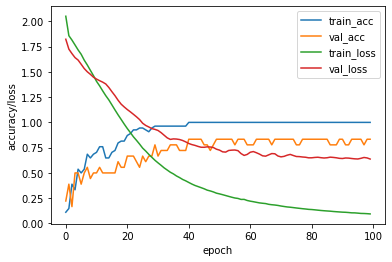

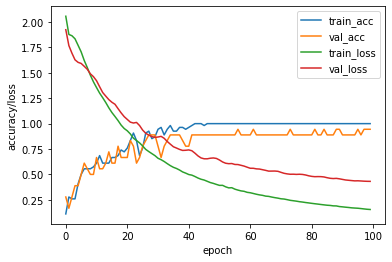

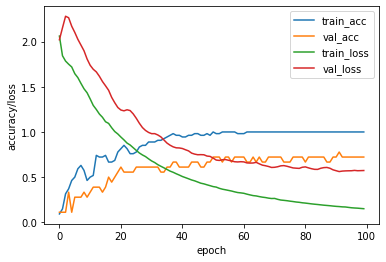

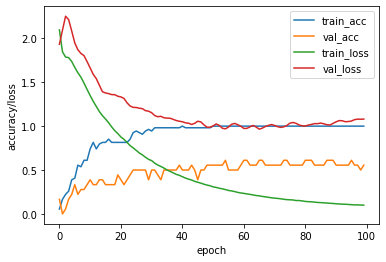

In [32]:
for history in histories4:
    pp.plot_hist(history)

<h2> Expriment5:</h2>

In [17]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 360)               82944360  
_________________________________________________________________
dense_23 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_24 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1687      
Total params: 83,166,007
Trainable params: 83,166,007
Non-trainable params: 0
__________________________________________

In [18]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 3s 47ms/step - loss: 4.5390 - accuracy: 0.1111 - val_loss: 6.6134 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 2s 40ms/step - loss: 9.2058 - accuracy: 0.1667 - val_loss: 10.2480 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 2s 40ms/step - loss: 8.7686 - accuracy: 0.1481 - val_loss: 3.5982 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9425 - accuracy: 0.2778 - val_loss: 4.5796 - val_accuracy: 0.3889
Epoch 5/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9363 - accuracy: 0.3519 - val_loss: 2.5044 - val_accuracy: 0.6111
Epoch 6/25
54/54 [==============================] - 2s 39ms/step - loss: 2.1369 - accuracy: 0.4444 - val_loss: 1.7686 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 2s 40ms/step - loss: 1.5409 - accuracy: 0.3704 - val_lo

In [19]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.51167821 0.78333335]
Standard deviation for loss & accuracy:  [0.07887788 0.07264831]
Duration in seconds:  218
